<a href="https://colab.research.google.com/github/amithchennavar/PROJECT_1/blob/master/Decision_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How  to plot a Decision Boundary for Machine Learning Algorithms in Python**

---


A popular diagnostic for understanding the decisions made by a classification algorithm is the decision surface. This is a plot that shows how a trained machine learning algorithm predicts a coarse grid across the input feature space.

A decision surface plot is a powerful tool for understanding how a given model “sees” the prediction task and how it has decided to divide the input feature space by class label

In this tutorial, you will discover how to plot a decision surface for a classification machine learning algorithm.

After completing this tutorial, you will know:
 

1.Decision surface is a diagnostic tool for understanding how a classification algorithm divides up the feature space.   
2.How to plot a decision surface for using crisp class labels for a machine learning algorithm and
how to plot and interpret a decision surface using predicted probabilities .

So lets get started!!!


In [ ]:
#Generate a data set
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000,centers=2,n_features=2,random_state=26,cluster_std=3)


In [ ]:
#create scatter plot for samples from each class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
X_df=pd.DataFrame(X,columns=['x1','x2'])
X_df.head()


,x1,x2
0,3.368579,11.595549
1,5.434311,5.140295
2,-3.277207,7.330728
3,-2.352273,0.278248
4,-3.304148,-3.931708


In [ ]:
y_df = pd.DataFrame(y, columns=["class"])
y_df.head()

,class
0,1
1,1
2,0
3,0
4,0


In [ ]:
frames=[X_df,y_df]
data=pd.concat(frames,axis=1)
data.head()

,x1,x2,class
0,3.368579,11.595549,1
1,5.434311,5.140295,1
2,-3.277207,7.330728,0
3,-2.352273,0.278248,0
4,-3.304148,-3.931708,0


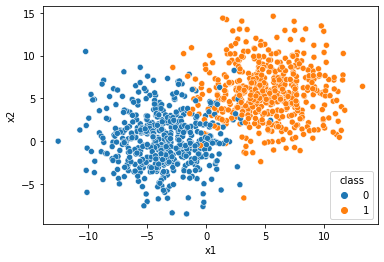

In [ ]:
#create a scatterplot for samples from each class 
sns.scatterplot(x='x1',y='x2',hue='class',data=data)

**FIT PREDICTIVE CLASSIFICATION MODEL**

We can now fit a model on our dataset.

In this case, we will fit a logistic regression algorithm because we can predict both crisp class labels and probabilities, both of which we can use in our decision surface.

We can define the model, then fit it on the training dataset.

In [ ]:
#define the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#fit the model
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#make predictions
yhat=model.predict(X)
yhat

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
#evaluate the prediction
#the predictions can evaluated by using classification accuracy

from sklearn.metrics import accuracy_score
acc=accuracy_score(y,yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.964


**PLOT A DECISION SURFACE**

We can create a decision boundry by fitting a model on the training dataset, then using the model to make predictions for a grid of values across the input domain.

Once we have the grid of predictions, we can plot the values and their class label.

A scatter plot could be used if a fine enough grid was taken. A better approach is to use a contour plot that can interpolate the colors between the points.

The contourf() Matplotlib function can be used.

This requires a few steps.

First, we need to define a grid of points across the feature space.

To do this, we can find the minimum and maximum values for each feature and expand the grid one step beyond that to ensure the whole feature space is covered.

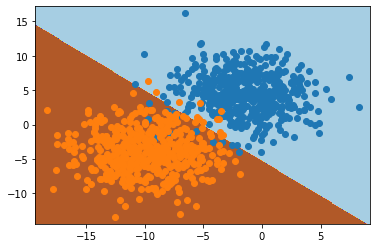

In [ ]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
